<a href="https://colab.research.google.com/github/BiancaHill/Data-Science/blob/main/Bian_Hill_U2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 2 Project: Flipping Metaphorical Coins

**Task**:

Two parts:

1. Propose a data set that's compatible with a pymc betabinomial model. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a betabinomial model using pymc within the colab environment, on a data set of your choice.

Data: [Goodreads: Percy Jackson and the Lightning Theif by Rick Riordan](https://www.goodreads.com/book/show/40552609-percy-jackson-and-the-lightning-thief?from_search=true&from_srp=true&qid=R0JrLKb3Hx&rank=2#CommunityReviews)

This model represents the chance of a person rating the first book in a popular book series, Percy Jackson and The Olympians, 5 stars on Goodreads.


In [53]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm



I chose my prior, 400 yes's and 600 no's based on the assumption that it's likely some people you ask would say a 4 versus a 5, not everyone who's read the book would be posting a review on it, and my background knowledge of the opinions of people I've asked.

<Axes: >

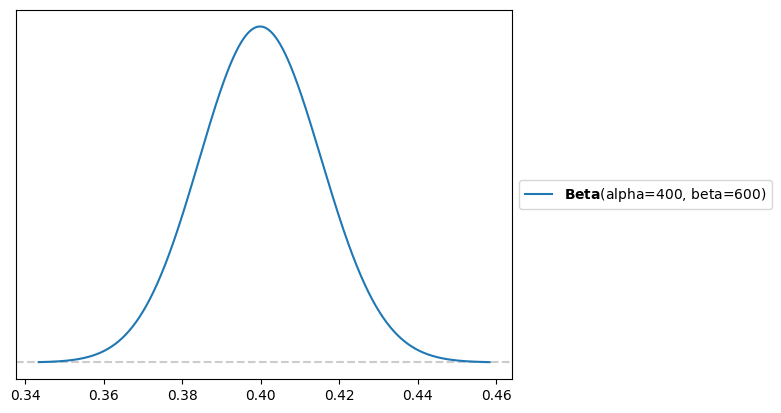

In [54]:
pz.Beta(alpha=400,beta=600).plot_pdf()

My prior graph shows about a 40% chance of a yes. Because my prior was 400 yes's and 600 no's, my total is 1000 which 400/1000 is about 0.40 or 40%, exactly what my graph is telling me. Comparing my beta distribution graph and my analytic graph (see below), I can make a guess that my actual probability will be slightly larger than my current percentage as the analytic graph includes some actual data.

In [55]:
#Priors
yes = 400
no = 600

k = 16408
n = 31281
analytic_B=pz.Beta(alpha=yes+k,beta=n-k+no)
analytic_B.mean()

0.5206777980855611

<Axes: >

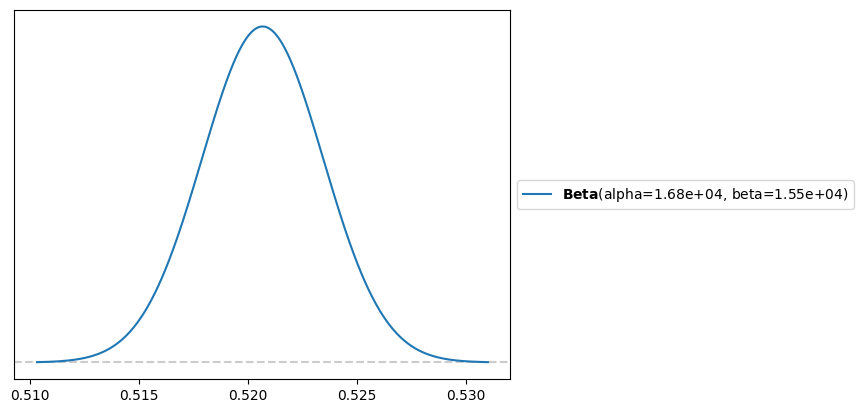

In [56]:
analytic_B.plot_pdf()

In [57]:
#the people that rated it 5 stars
B_yes = np.repeat(1, 16408)

#the people that didn't rate it 5 stars
B_no = np.repeat(0, 14872)

#combine makes and misses into one array
B_data = np.concatenate( [B_yes,B_no] )

In [58]:
with pm.Model() as pj_B_model:
  θ = pm.Beta('θ' , alpha = 400. , beta = 600.)
  y = pm.Bernoulli('y', p = θ, observed = B_data)
  idata_B = pm.sample(1000)

<Axes: title={'center': 'θ'}>

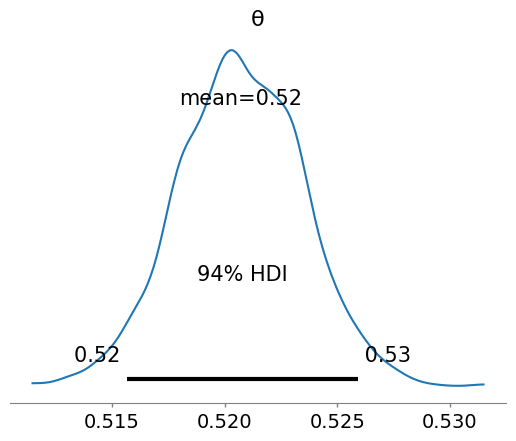

In [59]:
az.plot_posterior(idata_B)

My likelihood graph and final result has a peak of 0.52 or 52%, which is around the percentage of yes's in the actual data is unsuprising. Because our actual data shows about 50% of all reviews on the site being 5 stars, a probability of a ~50% chance of future reviews being similar. The amount of reviews being in the millions also suggests that future data will follow the same trend because of how long the trend has had to form and the amount of reviews that have gone into making that trend.

Optional further analysis is below:

<Axes: title={'center': 'θ'}>

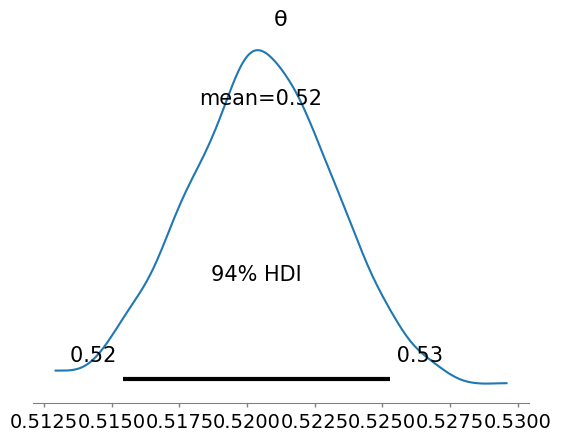

In [60]:
az.plot_posterior( {'θ' : analytic_B.rvs(1000)} )

In [61]:
pm.sample_posterior_predictive(idata_B, model=pj_B_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [62]:
stacked_B = az.extract(idata_B, group="posterior_predictive")

In [63]:
B_data_future = np.repeat([1,0], repeats = [16408,31281])

In [64]:
with pm.Model() as pj_B_future_model:
  #same prior from before based on Euroleague data
  θ = pm.Beta('θ' , alpha = 400. , beta = 600.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = B_data_future)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_B_future = pm.sample(2000)

<Axes: title={'center': 'θ'}>

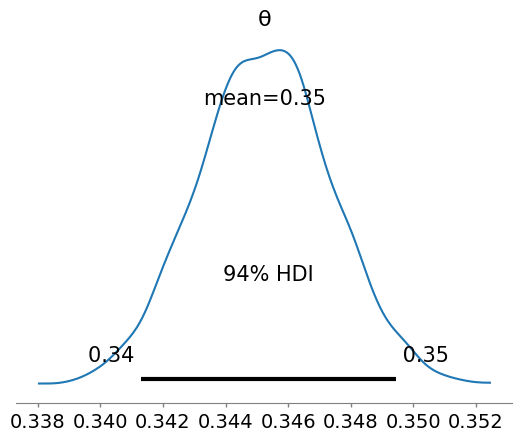

In [65]:
az.plot_posterior(idata_B_future)

In [66]:
pm.sample_posterior_predictive(idata_B_future, model=pj_B_future_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [67]:
stacked_B_future = az.extract(idata_B_future, group="posterior_predictive")

In [68]:
stacked_B_future.sel(sample=0).sel(draw=0).y.to_series().values

array([0, 0, 1, ..., 0, 1, 0])

In [69]:
stacked_B_future.mean()

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    y        float64 8B 0.3453